/var/folders/cv/khdc4zcd09j8jq7qcqhlct8m0000gn/T/ipykernel_10785/3829597202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='IslemTutarı', palette='muted')


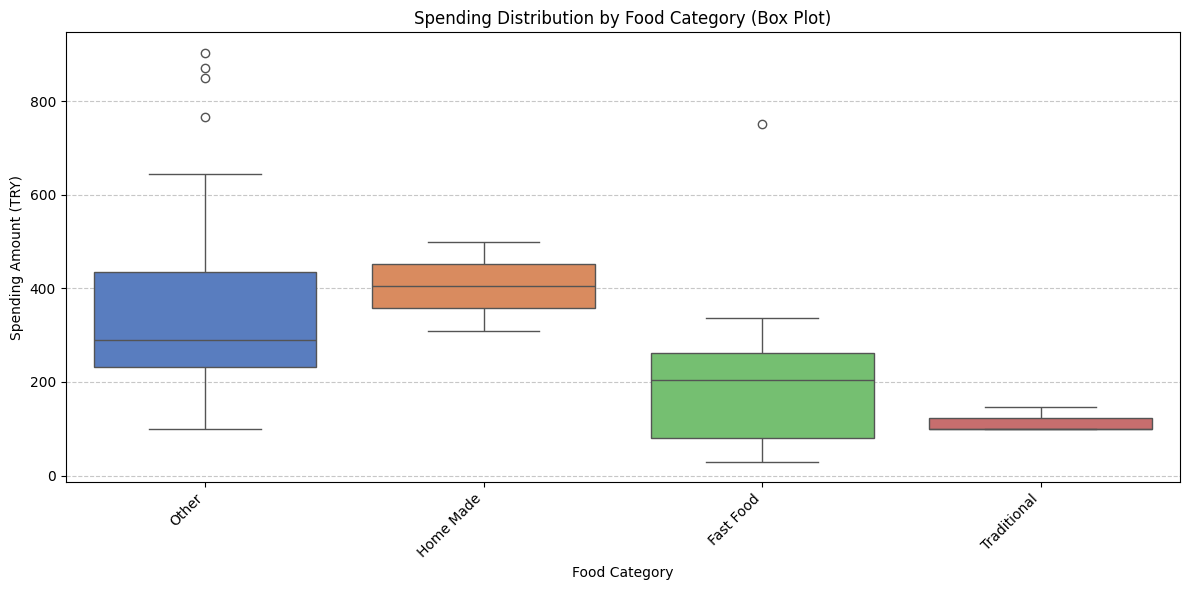

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
data = pd.read_csv('/Users/emre/Desktop/dsa210_project/emre_yontucu_dsa210_project/Emre_YONTUCU_ticket.csv')

# Harcama sütununun sayısal olduğundan emin olun
data['IslemTutarı'] = data['IslemTutarı'].str.replace(',', '.').astype(float)

# Restoran isimlerine göre kategorilere ayırma
def categorize_restaurant(name):
    if 'Cafe' in name or 'Kafe' in name:
        return 'Cafe'
    elif 'Fast' in name or 'Burger' in name or 'Mc' in name:
        return 'Fast Food'
    elif 'Ev' in name or 'Yemek' in name:
        return 'Home Made'
    elif 'Pide' in name or 'Kebap' in name:
        return 'Traditional'
    else:
        return 'Other'

data['category'] = data['UyeKurulusTabelaAdı'].apply(categorize_restaurant)

# Box plot görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='category', y='IslemTutarı', palette='muted')
plt.title('Spending Distribution by Food Category (Box Plot)')
plt.xlabel('Food Category')
plt.ylabel('Spending Amount (TRY)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
